In [92]:
"""
%%bash
transeq seqdump.txt 
When prompted set file name to all_prots.pep
mafft all_prots.pep > protein_alignment.txt
"""

Process is interrupted.


In [15]:
# imports 
from fasta_iterator_class import FASTAReader
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [3]:
#seq dump is our download, with the query sequence copy pasted to the benging
nt_sequences=FASTAReader(open("seqdump.txt",'r'))
#protein alignment from step 2
protein_alignment=FASTAReader(open('protein_alignment.txt'))
#new file to write nt alignment with gaps 
nt_alignment=open("nt_alignmnet.fa","w+")
for nt,prot in zip(nt_sequences,protein_alignment):
    #writes fasta query sequence
    nt_alignment.write(">"+nt[0]+"\n")
    seqwgaps=""
    nt_count=0
    prot_count=0
    protein=prot[1]
    dna=nt[1]
    #iterates through protein length 
    while prot_count<len(protein):
        if protein[prot_count]=="-":
            seqwgaps+="---"
        else:
            #only increase nucleotide index if you don't add gaps
            seqwgaps+=dna[nt_count:nt_count+3]
            nt_count+=3
        prot_count+=1
    nt_alignment.write(seqwgaps+"\n")
nt_alignment.close()       

In [70]:
codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}
#synonymous/non synonymous assuming one codon change
synon_table = {
'ATA':(2,7), 'ATC':(2,7), 'ATT':(2,7), 'ATG':(0,9),
'ACA':(3,6), 'ACC':(3,6), 'ACG':(3,6), 'ACT':(3,6),
'AAC':(1,8), 'AAT':(1,8), 'AAA':(1,8), 'AAG':(1,8),
'AGC':(1,8), 'AGT':(1,8), 'AGA':(1,8), 'AGG':(1,8),
'CTA':(3,6), 'CTC':(3,6), 'CTG':(3,6), 'CTT':(3,6),
'CCA':(3,6), 'CCC':(3,6), 'CCG':(3,6), 'CCT':(3,6),
'CAC':(1,8), 'CAT':(1,8), 'CAA':(1,8), 'CAG':(1,8),
'CGA':(3,6), 'CGC':(3,6), 'CGG':(3,6), 'CGT':(3,6),
'GTA':(3,6), 'GTC':(3,6), 'GTG':(3,6), 'GTT':(3,6),
'GCA':(3,6), 'GCC':(3,6), 'GCG':(3,6), 'GCT':(3,6),
'GAC':(1,8), 'GAT':(1,8), 'GAA':(1,8), 'GAG':(1,8),
'GGA':(3,6), 'GGC':(3,6), 'GGG':(3,6), 'GGT':(3,6),
'TCA':(3,6), 'TCC':(3,6), 'TCG':(3,6), 'TCT':(3,6),
'TTC':(1,8), 'TTT':(1,8), 'TTA':(1,8), 'TTG':(1,8),
'TAC':(1,8), 'TAT':(1,8), 'TAA':(2,7), 'TAG':(2,7),
'TGC':(1,8), 'TGT':(1,8), 'TGA':(2,7), 'TGG':(0,9)
}

In [71]:
#gapped nt MSA
gapped=FASTAReader(open("nt_alignmnet.fa"))

ref=''
count=0
query_list=[]
#first is reference, all others are query 
for query in gapped:
    if count==0:
        ref=query[1]
    else:
        query_list.append(query[1])
    count+=1
dN=[]
dN_site=[]
dS=[]
dS_site=[]



for r in range(0,len(ref),3): 
    dNtemp=0
    dStemp=0
    if ref[r:r+3]=="---":
        pass
    else: 
        #intializes first codon and AA
        nuc1=ref[r:r+3]
        aa1=codontable[nuc1]
        #iterates through each query 
        for query in query_list:
            #codon at same position
            nuc2=query[r:r+3]
            # removes gaps and strange characters
            if nuc2 not in codontable:
                pass
            else:
                aa2=codontable[nuc2]
                if nuc1!=nuc2: 
                    if (aa1==aa2):
                        dStemp += 1
                    elif (aa1!= aa2):
                        dNtemp += 1
        # if they changed/were a match, add transition frequencies           
        if dNtemp!=0 or dStemp!=0:
            nt=synon_table[nuc1]
            dN_site.append(nt[1])
            dS_site.append(nt[0])
        dN.append(dNtemp)
        dS.append(dStemp)


In [56]:
dN_dS=[]
for n,s in zip(dN,dS):
    dN_dS.append(n-s)
# can't use scipy stats zscore because we are assuming mean of data is 0. 
std=np.std(dN_dS)
zscore=[]
for codon in dN_dS:
    zscore.append(codon/std)
#double sided p value from scipy stats
p_values = sts.norm.sf(zscore)*2

In [76]:
dN_corrected=[]
dS_corrected=[]
#corrects dn ds 
for s_1,s_2, n_1,n_2 in zip(dS,dS_site,dN,dN_site):
    # don't correct if no synoymous mutations 
    if s_2==0:
        dS_corrected.append(s_1)
        dN_corrected.append(n_1)
    else:
        dS_corrected.append(s_1/s_2)
        dN_corrected.append(n_1/n_2)
dN_dS_cor=[]
for n,s in zip(dN_corrected,dS_corrected):
    dN_dS_cor.append(n-s)
# can't use scipy stats zscore because we are assuming mean of data is 0. 
std=np.std(dN_dS_cor)
zscore_cor=[]
for codon in dN_dS_cor:
    zscore_cor.append(codon/std)
p_values_cor = sts.norm.sf(zscore_cor)*2       
        

Text(0, 0.5, 'log2 dN/dS')

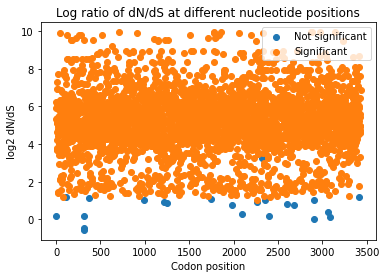

In [83]:
codon=[]
codon_sig=[]
dNdS=[]
dNdS_sig=[]
for i in range(len(dN)):
    if dN[i]!=0 and dS[i]!=0 and p_values[i]>0.05: 
        dNdS.append(math.log((dN[i]/dS[i]),2))
        codon.append(i)
    elif dN[i]!=0 and dS[i]!=0 and p_values[i]<0.05: 
        dNdS_sig.append(math.log((dN[i]/dS[i]),2))
        codon_sig.append(i)
fig,ax=plt.subplots()
ax.scatter(codon,dNdS,label="Not significant")
ax.scatter(codon_sig,dNdS_sig,label="Significant")
ax.legend(loc='upper right')
ax.set_title("Log ratio of dN/dS at different nucleotide positions")
plt.xlabel("Codon position")
plt.ylabel("log2 dN/dS")

Text(0, 0.5, 'log2 dN/dS')

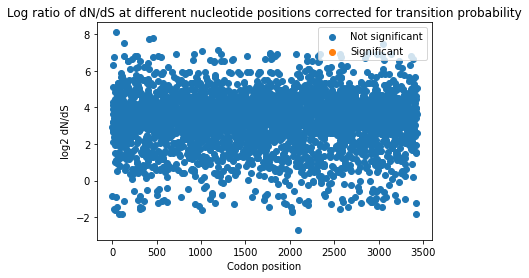

In [84]:
codon=[]
codon_sig=[]
dNdS=[]
dNdS_sig=[]
for i in range(len(dN_corrected)):
    if dN[i]!=0 and dS[i]!=0 and p_values_cor[i]>0.05: 
        dNdS.append(math.log((dN_corrected[i]/dS_corrected[i]),2))
        codon.append(i)
    elif dN[i]!=0 and dS[i]!=0 and p_values_cor[i]<0.05: 
        dNdS_sig.append(math.log((dN_corrected[i]/dS_correcged[i]),2))
        codon_sig.append(i)
fig,ax=plt.subplots()
ax.scatter(codon,dNdS,label="Not significant")
ax.scatter(codon_sig,dNdS_sig,label="Significant")
ax.legend(loc='upper right')
ax.set_title("Log ratio of dN/dS at different nucleotide positions corrected for transition probability")
plt.xlabel("Codon position")
plt.ylabel("log2 dN/dS")
# no significance once you correct for transition probabilities. WILD! 